# Redes Neuronales Artificiales & Deep Learning

## Objetivos de este curso

- **Conocer, entender y aplicar algunos modelos clásicos de Redes Neuronales Artificiales**, y algunas habilidades útiles en la práctica.
- **Conocer los conceptos básicos del Aprendizaje Profundo y aplicar las herramientas para desarrollar aplicaciones de machine learning**.
- **Aprender a utilizar los modelos de Deep Learning de Keras con la biblioteca Scikit-Learn de Python**, y evaluar los modelos de Keras utilizando la validación cruzada en scikit-learn (la biblioteca scikit-learn es la biblioteca más popular para Machine Learning en Python).
- **Identificar el tipo de red neuronal más adecuado para cada problema**, y las limitaciones de cada arquitectura.
- **Presentar a Python como herramienta de simulación de Redes Neuronales Artificiales**, y el ambiente de trabajo del curso!!!

## Schedule:

- Comenzando...
- Introducción
- Perceptrón
- Redes neuronales estáticas
- Redes recurrentes y mapas auto-organizados
- Memorias asociativas y Redes de funcion de base radial
- Introducción a las bibliotecas de aprendizaje profundo
- Modelos de regresión con Keras
- Modelos de clasificación con Keras
- Redes neuronales convolucionales
- Redes neuronales recurrentes

# Creación de una RNA en Keras

In [1]:
# Run this only in Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
colab_path = '/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Use one of them depending on the platform

## Base de datos MNIST

La base de datos MNIST es una gran base de datos de dígitos escritos a mano que se usa comúnmente para entrenar varios sistemas de procesamiento de imágenes.

In [3]:
from IPython.display import Image
Image(filename=valid_path + 'mnist01.png')

Tiene un conjunto de entrenamiento de 60.000 muestras y un conjunto de pruebas de 10.000 muestras. Es un subconjunto de un conjunto más grande disponible en el NIST. Los dígitos han sido normalizados en cuanto a tamaño y centrados en una imagen de tamaño fijo.

## Datos para entrenamiento, validación y prueba

Para la configuración y evaluación de un modelo en Machine Learning, y por ende Deep Learning, habitualmente se dividen los datos disponibles en tres conjuntos: **datos de entrenamiento (training), datos de validación (validation) y datos de prueba (test)**. Los datos de entrenamiento son los que se usan para que el algoritmo de aprendizaje obtenga los parámetros del modelo. Si el modelo no se adapta a los datos de validación (por ejemplo, si presentara *overfitting*), en este caso modificaríamos el valor de ciertos hiperparámetros y después de entrenarlo nuevamente con los datos de entrenamiento volveríamos a evaluarlo con los de validación. Podemos ir haciendo estos ajustes de los hiperparámetros guiados por los datos de validación hasta que obtenemos unos resultados de validación que consideremos correctos.  Si se sigue este procedimiento, debemos ser conscientes de que, en realidad, los datos de validación han influido en el modelo para que se ajustara también a los datos de validación. Por este motivo reservamos siempre un conjunto de datos de prueba para evaluación final del modelo que solo se usarán al final de todo el proceso, cuando consideremos que el modelo está acabado de afinar y ya no modificaremos más ninguno de sus hiperparámetros.

## Precarga de los datos en Keras

En Keras el conjunto de datos MNIST se encuentra precargado en forma de cuatro arrays Numpy y se pueden obtener con el siguiente código:

In [1]:
import keras
print(keras.__version__) # Imprime version utilizada de Keras

from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

2.8.0
11501568/11490434 [==============================] - 0s 0us/step


In [5]:
pip show tensorflow # Imprime versión utilizada de TensorFlow

Name: tensorflow
Version: 2.8.2+zzzcolab20220629235552
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: termcolor, flatbuffers, keras, libclang, grpcio, tensorflow-estimator, tensorboard, protobuf, tensorflow-io-gcs-filesystem, astunparse, typing-extensions, google-pasta, wrapt, keras-preprocessing, setuptools, six, numpy, opt-einsum, absl-py, gast, h5py
Required-by: kapre


*x_train* y  *y_train* conforman el conjunto de entrenamiento, mientras que *x_test* y *y_test* contienen los datos para el test. Las imágenes se encuentran codificadas como arrays Numpy y sus correspondientes etiquetas (labels) que van desde el 0 hasta el 9. De momento solo tendremos en cuenta los datos de entrenamiento y de prueba.

Podemos comprobar qué valores hemos cargado visualizando, por ejemplo, cualquiera de las imágenes del conjunto MNIST, por ejemplo la imagen 25,  y usando el siguiente código Python:

In [2]:
import matplotlib.pyplot as plt
plt.imshow(x_train[25], cmap=plt.cm.binary)

Y si queremos ver su correspondiente etiqueta (label) podemos hacerlo mediante:

In [ ]:
print(y_train[25])

2


## Representación de los datos en Keras

Keras usa un array multidimensional de Numpy como estructura básica de datos, le llama a esta estructura de datos *tensor*. De manera resumida podríamos decir que un tensor tiene tres atributos principales:

- Número de ejes (*Rank* o *ndim*): un tensor que contiene un solo número lo llamaremos scalar (o un tensor 0-dimensional, o tensor 0D). Un array de números lo llamamos vector, o tensor 1D. Un array de vectores será una matriz (matrix), o tensor 2D. Si empaquetamos esta matriz en un nuevo array, obtenemos un tensor 3D, que podemos interpretarlo visualmente como un cubo de números. Empaquetando un tensor 3D en un array, podemos crear un tensor 4D, y así sucesivamente. En la librería Numpy de Python esto se llama ndim del tensor.
- Forma (*shape*): se trata de una tupla de enteros que describen cuántas dimensiones tiene el tensor en cada eje. Un vector tiene un shape con un único elemento, por ejemplo “(5,)”, mientras que un escalar tiene un shape vacío “( )”. En la librería Numpy este atributo se llama shape.
- Tipo de datos (*data type*): este atributo indica el tipo de datos que contiene el tensor, que pueden ser por ejemplo uint8, float32, float64, etc. En raras ocasiones tenemos, en nuestro contexto, tensores de tipo char (nunca string). En la librería Numpy este atributo se llama dtype.

Verifiquemos el número de ejes y dimensiones del tensor *train_images* de nuestro ejemplo:

In [7]:
print(x_train.ndim)

3


In [8]:
print(x_train.shape)

(60000, 28, 28)


Y si queremos saber qué tipo de datos contiene:

In [9]:
print(x_train.dtype)

uint8


## Normalización de los datos de entrada

Estas imágenes de MNIST de 28×28 píxeles se representan como una matriz de números cuyos valores van entre [0, 255] de tipo uint8.

In [10]:
print(x_train[25])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  83  91 143 255 190  91
   50   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   9  49 180 246 253 253 253 253 253
  220 154  17   3   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  46 107 178 253 253 253 253 253 253 253 253
  253 253 253 126  45   0   0   0   0   0]
 [  0   0   0   0   0   0   0 107 253 253 253 253 223 220 220 220 220 245
  253 253 253 253 106   0   0   0   0   0]
 [  0   0   0   0   0   0   0 107 173 253 229 129  12   0   0   

Como hemos hablado en clase, es habitual escalar los valores de entrada de las redes neuronales a unos rangos determinados. En este ejemplo los valores de entrada vamos a escalarlos a valores de tipo float32 dentro del intervalo [0, 1]:

In [3]:
# Guardo una copia sin alterar
x_train_original = x_train
x_test_original = x_test

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [5]:
print(x_train.dtype)

float32


In [14]:
print(x_train[25])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Para la entrada de datos a nuestra red neuronal (veremos que en convolucionales no hace falta) debemos hacer una transformación del tensor (la imagen) de 2 dimensiones (2D) a un vector de una dimensión (1D). Es decir, la matriz de 28×28 números se puede representar con un vector (array) de 784 números (concatenando fila a fila), que es el formato que acepta como entrada una red neuronal densamente conectada.

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [16]:
print(x_train.shape)

(60000, 784)


Las etiquetas (labels) para cada dato de entrada (recordemos que en nuestro caso son números entre 0 y 9 que indican qué dígito representa la imagen, es decir, a que clase se asocia) se va a representar con un vector de 10 posiciones, donde la posición correspondiente al dígito que representa la imagen con un 1, y el resto de posiciones del vector contienen el valor 0.

En este ejemplo usaremos lo que se conoce como *one-hot encoding*, consiste en transformar las etiquetas en un vector de tantos ceros como el número de etiquetas distintas existan, y que contiene el valor de 1 en el índice que le corresponde al valor de la etiqueta. Keras ofrece muchas funciones de soporte, y entre ellas to_categorical para realizar esta transformación, que la podemos importar de keras.utils:

In [7]:
#from keras.utils import to_categorical #Mejorada la integracion
from tensorflow.keras.utils import to_categorical

Para ver el efecto de la transformación podemos ver los valores antes y después de aplicar *to_categorical*:

In [8]:
plt.imshow(x_train_original[25], cmap=plt.cm.binary)

In [19]:
print(y_train[25])

2


In [20]:
print(y_train.shape)

(60000,)


In [9]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [22]:
print(y_train[25])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
print(y_train.shape)

(60000, 10)


Ahora ya tenemos los datos preparados para ser usados en nuestro ejemplo de modelo simple que vamos a programar en Keras.

## Redes densamente conectadas en Keras

La estructura de datos principal en Keras es la clase *Sequential*, que permite la creación de una red neuronal básica. La clase *Sequential*  de la librería de Keras es una envoltura para el modelo de red neuronal secuencial que ofrece Keras, y se puede crear  de la siguiente manera:

In [ ]:
from keras.models import Sequential
model = Sequential()

En este caso, el modelo en Keras se considera como una secuencia de capas en las que cada una de ellas propaga gradualmente los datos de entrada para obtener la salida deseada. En Keras podemos encontrar todos los tipos de capas requeridas y se pueden agregar fácilmente al modelo mediante el método *add()*.

A partir del modelo *Sequential*, podemos  definir las capas de manera sencilla con el método *add()*.

La construcción en Keras de nuestro modelo para reconocer las imágenes de dígitos podría ser el siguiente:

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,))) # Nodos de entrada y capa oculta, 10 neuronas sigmoides
model.add(Dense(10, activation='softmax')) # Capa de salida

Aquí, la red neuronal se ha definido como una secuencia de dos capas que están densamente conectadas, es decir, que todas las neuronas de cada capa están conectadas con todas las neuronas de la capa siguiente. Visualmente podríamos representarlo de la siguiente manera:



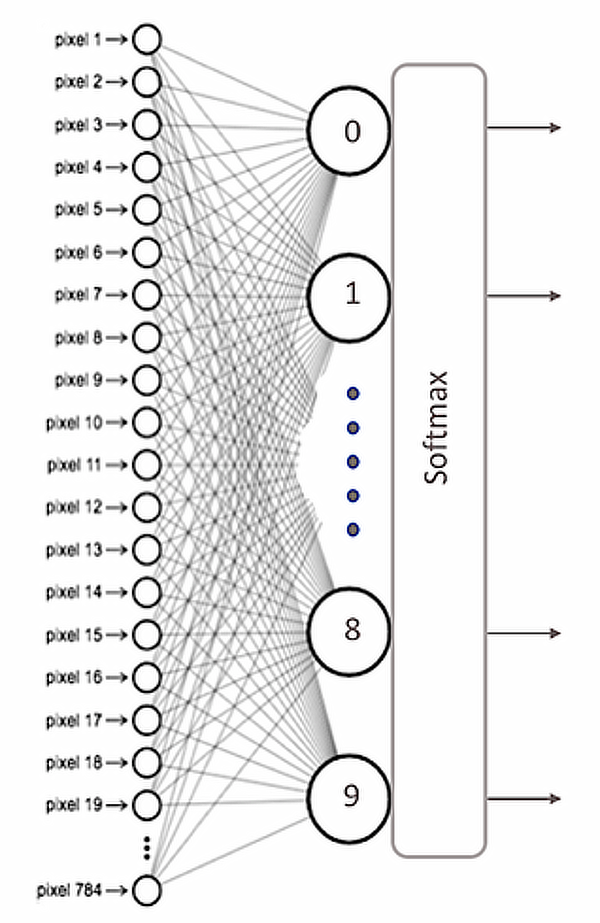

In [25]:
Image(filename=valid_path + 'mnist02.png')

En este código definimos en el argumento *input_shape* de la primera capa cómo son los datos de entrada: un tensor que indica que tenemos 784 nodos de entrada. También se define el número de neuronas en la capa (10) y la función de activación como Sigmoide para las neuronas de esta capa.

Una característica muy interesante de la librería de Keras es que esta deducirá automáticamente la forma de los tensores entre capas después de la primera. Esto significa que el programador solo tiene que establecer esta información para la primera de ellas. Además, para cada capa indicamos el número de nodos que tiene y la función de activación que aplicaremos en ella.

La segunda capa es una capa *softmax* de 10 neuronas, lo que significa que devolverá una matriz de 10 valores de probabilidad que representan a los 10 dígitos posibles (en general, la capa de salida de una red de clasificación tendrá tantas neuronas como clases, menos en una clasificación binaria, en donde solo necesita una neurona). Cada valor será la probabilidad de que la imagen del dígito actual pertenezca a cada una de ellas.

La función de activación *softmax* se basa en calcular *las evidencias* de que una determinada imagen pertenece a una clase en particular y luego se convierten estas evidencias en probabilidades de que pertenezca a cada una de las posibles clases.

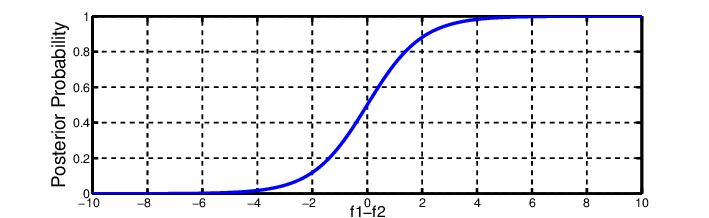

In [26]:
Image(filename=valid_path + 'mnist03.png')

Un método muy útil que proporciona Keras para comprobar la arquitectura de nuestra modelo es *summary()*:

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Para nuestro ejemplo, se indica que se requieren 7960 parámetros (columna Param #), que corresponden a 7850 parámetros para la primera capa y 110 para la segunda.

En la capa oculta por cada neurona *i* (10 neuronas en total) requerimos 784x10 parámetros para los pesos $w_{ij}$ que van de los nodos de entrada hacia las 10 neuronas. Además de los 10 parámetros adicionales para los 10 umbrales $w_{0i}$ correspondientes a cada una de ellas. En la segunda capa, al ser una función *softmax*, se requiere conectar todos sus 10 nodos con los 10 nodos de la capa anterior, y por tanto se requieren 10×10 parámetros $c_{kl}$ además de los correspondientes 10 umbrales $c_{0k}$ correspondientes a cada nodo.

En el manual de Keras se puede encontrar los detalles de los argumentos que podemos indicar para la capa Dense. En nuestro ejemplo aparecen los más relevantes, donde el primer argumento indica el número de neuronas de la capa; el siguiente es la función de activación que usaremos en ella. En el siguiente capítulo hablaremos en más detalle de otras posibles funciones de activación más allá de las dos presentadas aquí: *sigmoid* y *softmax*.

También a menudo se indica la inicialización de los pesos como argumento de las capas *Dense*. Los valores iniciales deben ser adecuados para que el problema de optimización converja tan rápido como sea posible. En el manual de Keras se puede encontrar las diversas opciones de inicialización.

## Proceso de aprendizaje

Una vez que tengamos nuestro modelo definido, podemos configurar cómo será su proceso de aprendizaje con el método *compile()*, con el que podemos especificar algunas propiedades a través de argumentos del método.

El primero de estos argumentos es la función de *loss* que usaremos para evaluar el grado de **error** entre salidas calculadas y las salidas deseadas de los datos de entrenamiento. Por otro lado, se especifica un optimizador que, como veremos, es la manera que tenemos de especificar el algoritmo de optimitzación que permite a la red neuronal calcular los pesos de los parámetros a partir de los datos de entrada y de la función de loss definida.

Y finalmente debemos indicar la métrica que usaremos para monitorizar el proceso de aprendizaje (y prueba) de nuestra red neuronal. En este primer ejemplo solo tendremos en cuenta la *accuracy* (fracción de imágenes que son correctamente clasificadas). Por ejemplo, en nuestro caso podemos especificar los siguientes argumentos en método *compile()*:

In [12]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics = ['accuracy'])

Donde especificamos que la función de *loss* es *categorical_crossentropy*, el optimizador usado es el *stocastic gradient descent* (sgd) y la métrica es *accuracy*, con la que evaluaremos el porcentaje de aciertos averiguando dónde el modelo predice la etiqueta correcta.

Una vez definido el modelo y configurado su método de aprendizaje, este ya está listo para ser entrenado. Para ello podemos entrenar o ajustar el modelo a los datos de entrenamiento de que disponemos invocando al método *fit()* del modelo:

In [13]:
nn_dense = model.fit(x_train, y_train, batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 4s 2ms/step - loss: 2.2035 - accuracy: 0.3003
Epoch 2/30
600/600 [==============================] - 1s 2ms/step - loss: 1.9655 - accuracy: 0.5832
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 1.7466 - accuracy: 0.6542
Epoch 4/30
600/600 [==============================] - 1s 2ms/step - loss: 1.5507 - accuracy: 0.6892
Epoch 5/30
600/600 [==============================] - 1s 2ms/step - loss: 1.3822 - accuracy: 0.7223
Epoch 6/30
600/600 [==============================] - 1s 2ms/step - loss: 1.2395 - accuracy: 0.7524
Epoch 7/30
600/600 [==============================] - 1s 2ms/step - loss: 1.1193 - accuracy: 0.7781
Epoch 8/30
600/600 [==============================] - 1s 2ms/step - loss: 1.0187 - accuracy: 0.7968
Epoch 9/30
600/600 [==============================] - 1s 2ms/step - loss: 0.9349 - accuracy: 0.8111
Epoch 10/30
600/600 [==============================] - 2s 3ms/step - loss: 0.8649 - accuracy: 0.8229

Donde en los dos primeros argumentos hemos indicado los datos con los que entrenaremos el modelo en forma de arrays Numpy. Con el argumento *batch_size* se indica el número de datos que usaremos para cada actualización de los parámetros del modelo y con *epochs* estamos indicando el número de veces que usaremos todos los datos en el proceso de aprendizaje.

A grandes rasgos, en cada iteración de este algoritmo, este coge datos de entrenamiento de *x_train*, los pasa a través de la red neuronal (con los valores que en aquel momento tengan sus parámetros), compara el resultado obtenido con el esperado (indicado en *y_train*) y calcula la *loss* para guiar el proceso de ajuste de los parámetros del modelo, que intuitivamente consiste en aplicar el optimizador especificado anteriormente en el método *compile()* para calcular un nuevo valor de cada uno de los parámetros (pesos y umbrales) del modelo en cada iteración de tal forma de que se reduzca el de la *loss*.

Esta es la parte que, como veremos, puede llegar a tardar más tiempo y Keras nos permite ver su avance usando el argumento *verbose* (por defecto, igual a 1), además de indicar una estimación de cuánto tarda cada *epoch*:

Este es un ejemplo simple para introducir Keras con una red neuronal sencilla, pero como veremos  el método *fit()* permite muchos más argumentos que tienen un impacto muy importante en el resultado del aprendizaje. Además, este método retorna un objeto *History* que hemos omitido en este ejemplo. Su atributo *nn_dense.history* es el registro de los valores de *loss* para los datos de entrenamiento y resto de métricas en sucesivas *epochs*, así como otras métricas para los datos de validación si se han especificado. Esta es una herramienta fundamental para evaluar el comportamiento del modelo y evitar el sobreajuste.

## Evaluación del modelo

En este punto ya se ha entrenado la red neuronal, y ahora se puede evaluar cómo se comporta con datos nuevos de prueba (test) con el método *evaluate()*. Este devuelve dos valores:

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4333 - accuracy: 0.8895


Que indican qué tan bien o tan mal se comporta nuestro modelo con datos nuevos que nunca ha visto (que hemos almacenado en *x_test* y *y_test* cuando hemos realizado el *mnist.load_data()* ). De momento fijémonos solo en uno de ellos, la *accuracy*:

In [15]:
print('Test accuracy:', test_acc)

Test accuracy: 0.8895000219345093


Que está indicando que el modelo que hemos creado aplicado sobre datos que nunca ha visto anteriormente, clasifica el 90% de ellos correctamente.

In [16]:
nn_dense.history

{'accuracy': [0.3002833425998688,
  0.5831999778747559,
  0.6541833281517029,
  0.6891833543777466,
  0.7223166823387146,
  0.7524166703224182,
  0.7780500054359436,
  0.7967833280563354,
  0.8111000061035156,
  0.8228999972343445,
  0.8305666446685791,
  0.838783323764801,
  0.845300018787384,
  0.8507333397865295,
  0.855566680431366,
  0.8591833114624023,
  0.8616166710853577,
  0.8647833466529846,
  0.8674499988555908,
  0.869949996471405,
  0.8723333477973938,
  0.8740833401679993,
  0.8760833144187927,
  0.8775166869163513,
  0.8791666626930237,
  0.8806999921798706,
  0.8818666934967041,
  0.8831666707992554,
  0.8847666382789612,
  0.885450005531311],
 'loss': [2.2034943103790283,
  1.9655460119247437,
  1.7466495037078857,
  1.5506774187088013,
  1.3822152614593506,
  1.2394988536834717,
  1.1192574501037598,
  1.0187287330627441,
  0.9349249601364136,
  0.8649383187294006,
  0.8064147233963013,
  0.7571194171905518,
  0.7154114842414856,
  0.6799083352088928,
  0.649439573287

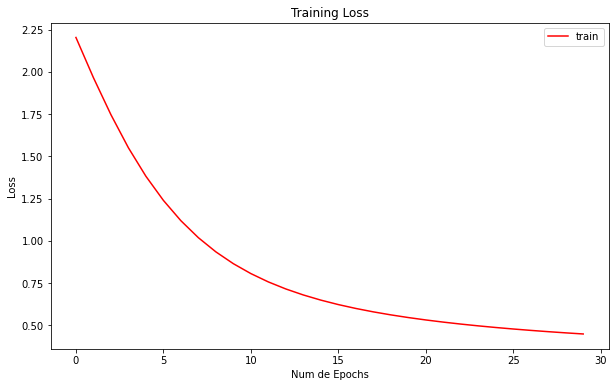

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 6) # Tamaño de la figura
plt.figure(0)  
plt.plot(nn_dense.history['accuracy'],'r')  
plt.xlabel('Num de Epochs')  
plt.ylabel('Accuracy')  
plt.title('Training Accuracy')  

plt.figure(1)  
plt.plot(nn_dense.history['loss'],'r')  
plt.xlabel('Num de Epochs')  
plt.ylabel('Loss')  
plt.title('Training Loss')  
plt.legend(['train','validation'])

plt.show()

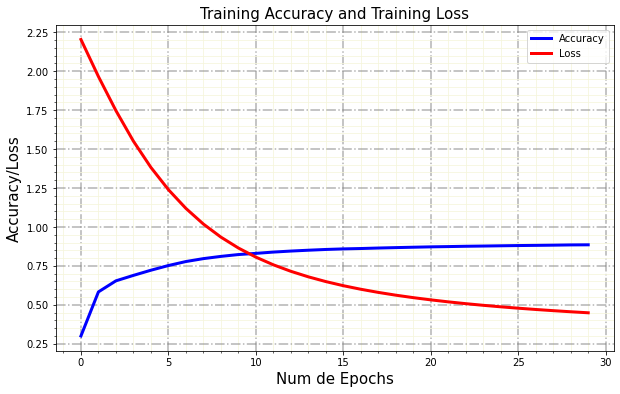

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 6) # Tamaño de la figura
line1, = plt.plot(nn_dense.history['accuracy'], color='Blue', label='Accuracy', linewidth=3) 
line2, = plt.plot(nn_dense.history['loss'], color='Red', label='Loss', linewidth=3)  
plt.legend(handles=[line1, line2], loc='best')

plt.xlabel('Num de Epochs', fontsize=15)
plt.ylabel('Accuracy/Loss', fontsize=15)
plt.title('Training Accuracy and Training Loss', fontsize=15) 
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1.5) # Mayor grid lines
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1) # Minor grid lines
plt.minorticks_on()
plt.show()

En este ejemplo, para evaluar este modelo solo nos hemos centrado en su *accuracy*, es decir la proporción entre las predicciones correctas que ha hecho el modelo y el total de predicciones. Sin embargo, aunque en ocasiones resulta suficiente, otras veces es necesario profundizar un poco más y tener en cuenta los tipos de predicciones correctas e incorrectas que realiza el modelo en cada una de sus categorías.

En Machine Learning una herramienta para evaluar modelos es la matriz de confusión (*confusion matrix*). Es una tabla con filas y columnas que contabilizan las predicciones en comparación con los valores reales. Usamos esta tabla para entender mejor cómo el modelo se comporta, y es muy útil para mostrar de forma explícita cuando una clase es confundida con otra. Una matriz de confusión para un clasificador binario tiene esta estructura:

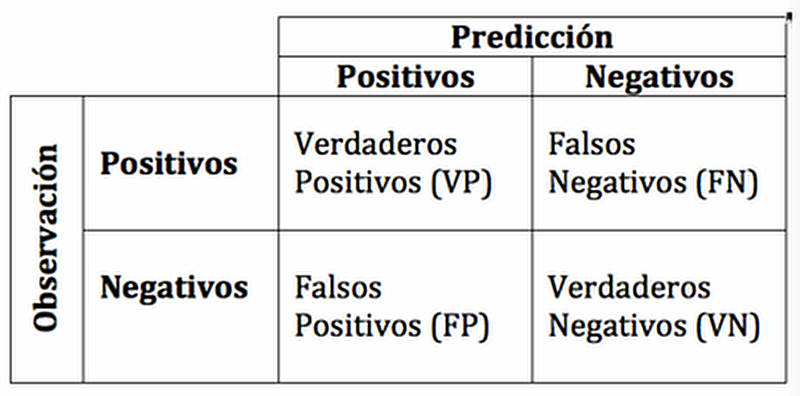

In [ ]:
Image(filename=valid_path + 'mnist04.png')

En la que:

- VP es la cantidad de positivos que fueron clasificados correctamente como positivos por el modelo.
- VN es la cantidad de negativos que fueron clasificados correctamente como negativos por el modelo.
- FN es la cantidad de positivos que fueron clasificados incorrectamente como negativos.
- FP es la cantidad de negativos que fueron clasificados incorrectamente como positivos.

Con esta matriz de confusión, la *accuracy* se puede calcular sumando los valores de la diagonal y divido por el total:

$$Accuracy=\frac{VP+VN}{VP+FP+VN+FN}$$

Ahora bien, la accuracy puede ser engañosa en la calidad del modelo porque al medirla para el modelo concreto no distinguimos entre los errores de tipo falso positivo y falso negativo, como si ambos tuvieran la misma importancia. Por ejemplo, piensen en un modelo que predice si una seta es venenosa. En este caso, el coste de un falso negativo, es decir, una seta venenosa dada por comestible podría ser dramático. En cambio al revés, un falso positivo, tiene un coste muy diferente.

Por ello tenemos otra métrica llamada *Sensitivity* (o *recall*) que nos indica que tan bien el modelo evita los falsos negativos:

$$Recall=\frac{VP}{VP+FN}$$

Es decir, del total de observaciones positivas (setas venenosas), cuantas detecta el modelo.

A partir de la matriz de confusión se pueden obtener diversas métricas para focalizar otros casos. La conveniencia de usar una métrica u otra dependerá de cada caso en particular y, en concreto, del costo asociado a cada error de clasificación del modelo.

## Generación de predicciones

Finalmente, queda el paso de usar el modelo creado en los anteriores apartados para realizar predicciones sobre qué dígito representan nuevas imáges. Para ello Keras ofrece el método *predict()* de un modelo que ya ha sido previamente entrenado.

Para probar este método podemos elegir un elemento cualquiera, por ejemplo uno del conjunto de datos de test *x_test*. Por ejemplo elijamos el elemento 100 de este conjunto de datos *x_test*:

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test_original[5000], cmap=plt.cm.binary)

Ahora veamos a que clase corresponde según el modelo entrenado:

In [ ]:
predictions = model.predict(x_test)

In [ ]:
import numpy as np
np.argmax(predictions[5000])

3